# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## <font color='brown'>랭킹정보 가져오기 </font>

In [1]:
from images import bigpycraft_bda as bpc
from IPython.display import Image 

## 1. 주간 음악 순위
> URL ::  https://music.naver.com/listen/history/index.nhn?type=TOTAL&year=2018&month=11&week=1
- TOP 50 : 순위, 곡명, 아티스트


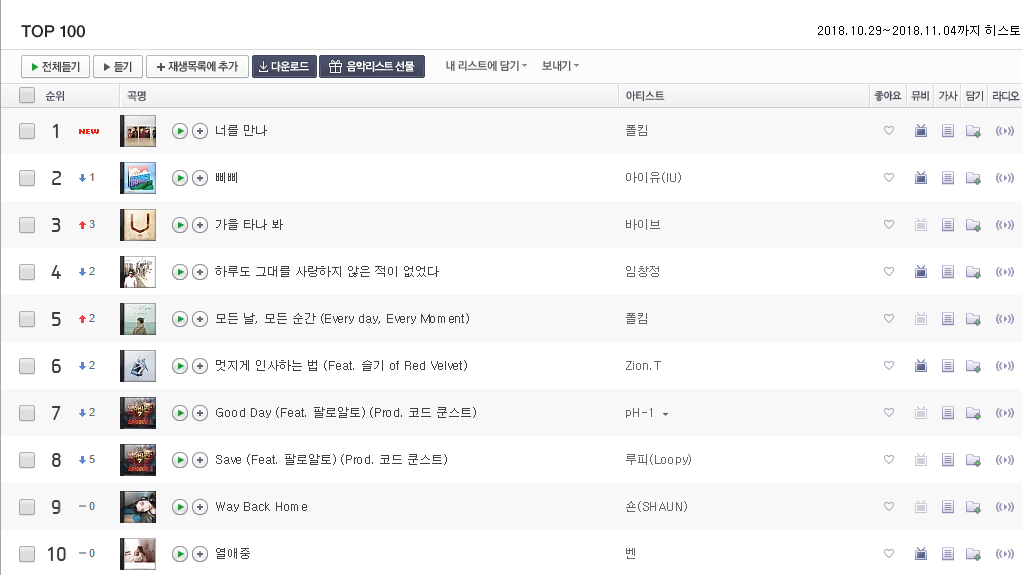

In [2]:
Image(bpc.BDA_PE_413_1)

In [3]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

In [4]:
year, month, week = (2018, 11, 1)
url = 'https://music.naver.com/listen/history/index.nhn?type=TOTAL&year={}&month={}&week={}'
url
html = urlopen(url.format(year, month, week))
soup = BeautifulSoup(html, "lxml")

In [5]:
print(str(soup)[:1000])

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>TOP 100 차트 히스토리 : 네이버 뮤직</title>
<link href="/css/music.css?bv=20181106115839" rel="stylesheet" type="text/css"/>
<link href="/css/music2.css?bv=20181106115839" rel="stylesheet" type="text/css"/>
<script charset="utf-8" src="/js/pkg_jindo.all.js?bv=20181106115839" type="text/javascript"></script>
<script charset="utf-8" src="/js/pkg_external.all.js?bv=20181106115839" type="text/javascript"></script>
<script charset="utf-8" src="/js/pkg_music.all.js?bv=20181106115839" type="text/javasc

``` python 
regex = re.compile('.*listing-col-.*')
    for EachPart in soup.find_all(regex):
        
        
regex = re.compile('.*listing-col-.*')
for EachPart in soup.find_all("div", {"class" : regex}):
        print EachPart.get_text()        
```

In [6]:
# regex = re.compile('_tracklist_move data(\d)+  ')
# div_tags = soup.find_all('tr', {"class" : regex})
# len(div_tags)

In [7]:
div_tags = soup.find_all('tr')
len(div_tags)

52

In [8]:
div_tags[0].get_text(), div_tags[1].get_text()

('\n\n순위\n순위변동\n곡명\n아티스트\n좋아요\n뮤직비디오, 가사, 내 리스트에 담기\n라디오\n구매\n',
 '\n \n\r\n\r\n\t\t\t\t\t\t\t\t{PLAY_TOGGLE}\r\n\t\t\t\t\t\t\t\t{ADD_TOGGLE}\r\n\r\n\r\n\t\t\t\t\t\t\t\t\n\r\n\r\n\r\n\t\t\t\t\t\t\t\t{TRACK_SONG_NAME}\r\n\r\n\t\t\t\t\t\t\t\n\r\n\r\n\r\n                                   {ARTIST}\r\n\r\n\t\t\t\t\t\t\t\n\n\n\n\n\n뮤직비디오, 가사, 내 리스트에 담기\n{RADIO}\n\r\n\r\n\t\t\t\t\t\t\t\t{MP3_BUY_LAYER_BTN}\r\n\r\n\t\t\t\t\t\t\t\t\n\n{MP3_BUY_LIST}\n{MUSIC_SPRING}\n{BELL_SOUND}\n{CONNECTION_SOUND}\n\n\n\n\n')

In [9]:
tr_tags = div_tags[2:]

In [10]:
len(tr_tags)

50

In [11]:
tmp = tr_tags[0]
tmp

<tr class="_tracklist_move data1 " trackdata="22307355|239121|true|true|false|true|false|false|0|true|true|false|false">
<td class="chk"><input class="_chkbox_item _disc_1 input_chk NPI=a:check,r:1,i:22307355" test="false" title="선택" type="checkbox"/></td>
<td class="ranking"><span class="num1"><span>1</span></span></td>
<td class="change">
<span class="new"><span>신규</span></span>
</td>
<td class="name">
<a class="thumb pht36 NPI=a:image,r:1,i:2574254" href="/album/index.nhn?albumId=2574254">
<img alt="너를 만나" height="32" onerror="this.onerror=null;this.src='https://musicmeta-phinf.pstatic.net/album/000/000/0.jpg?type=r32Fll';" src="https://musicmeta-phinf.pstatic.net/album/002/574/2574254.jpg?type=r32Fll" title="너를 만나" width="32"/>
<span class="mask"></span>
</a>
<a class="_play_ico ico_listen NPI=a:play,r:1,i:22307355" href="#"><img alt="듣기" height="18" src="https://ssl.pstatic.net/static/nmusic/201008/blank.gif" title="듣기" width="18"/></a>
<a class="_add_ico ico_add NPI=a:plus,r:1,i:

In [12]:
ranking = tmp.find('td', 'ranking')
ranking = ranking.get_text()
ranking

'1'

In [13]:
name = tmp.find('td', 'name')
name = name.get_text()
name = name.strip()
name

'너를 만나'

In [14]:
artist = tmp.find('td', '_artist artist').get_text()
artist = artist.strip()
artist

'폴킴'

In [15]:
tmp = tr_tags[6]

In [16]:
artist =  tmp.find('td', '_artist artist')

if artist is None:
    # print('없음')
    artist =  tmp.find('td', '_artist artist no_ell2')

else:
    # print('있음')
    pass
    
artist = artist.get_text()
artist = artist.strip()
artist

'pH-1'

In [17]:
def crawl_music_rank(year, month, week):
    
    Ranking  = []
    SongName = []
    Artist   = []
    
    # year, month, week = (2018, 11, 1)
    url = 'https://music.naver.com/listen/history/index.nhn?type=TOTAL&year={}&month={}&week={}'

    html = urlopen(url.format(year, month, week))
    soup = BeautifulSoup(html, "lxml")
    
    div_tags = soup.find_all('tr')
    len(div_tags)
        
    for tr_tags in div_tags[2:]:
        tmp = tr_tags
    
        ranking = tmp.find('td', 'ranking').get_text()
        print('ranking : {}'.format(ranking))
        name = tmp.find('td', 'name').get_text()
        name = name.strip()

        artist =  tmp.find('td', '_artist artist')

        if artist is None:
            # print('없음')
            artist =  tmp.find('td', '_artist artist no_ell2')

        else:
            # print('있음')
            pass

        artist = artist.get_text()
        artist = artist.strip()

        Ranking.append(ranking)
        SongName.append(name)
        Artist.append(artist)

    data   = {'순위':Ranking, '곡명':SongName, '아티스트':Artist }
    ret_df = pd.DataFrame(data)
    
    return ret_df


In [18]:
year, month, week = (2018, 11, 1)

df = crawl_music_rank(year, month, week)
df.head()

ranking : 1
ranking : 2
ranking : 3
ranking : 4
ranking : 5
ranking : 6
ranking : 7
ranking : 8
ranking : 9
ranking : 10
ranking : 11
ranking : 12
ranking : 13
ranking : 14
ranking : 15
ranking : 16
ranking : 17
ranking : 18
ranking : 19
ranking : 20
ranking : 21
ranking : 22
ranking : 23
ranking : 24
ranking : 25
ranking : 26
ranking : 27
ranking : 28
ranking : 29
ranking : 30
ranking : 31
ranking : 32
ranking : 33
ranking : 34
ranking : 35
ranking : 36
ranking : 37
ranking : 38
ranking : 39
ranking : 40
ranking : 41
ranking : 42
ranking : 43
ranking : 44
ranking : 45
ranking : 46
ranking : 47
ranking : 48
ranking : 49
ranking : 50


,순위,곡명,아티스트
0,1,너를 만나,폴킴
1,2,삐삐,아이유(IU)
2,3,가을 타나 봐,바이브
3,4,하루도 그대를 사랑하지 않은 적이 없었다,임창정
4,5,"모든 날, 모든 순간 (Every day, Every Moment)",폴킴


In [19]:
df.set_index('순위', inplace=True)
df

,곡명,아티스트
순위,,
1,너를 만나,폴킴
2,삐삐,아이유(IU)
3,가을 타나 봐,바이브
4,하루도 그대를 사랑하지 않은 적이 없었다,임창정
5,"모든 날, 모든 순간 (Every day, Every Moment)",폴킴
6,멋지게 인사하는 법 (Feat. 슬기 of Red Velvet),Zion.T
7,Good Day (Feat. 팔로알토) (Prod. 코드 쿤스트),pH-1
8,Save (Feat. 팔로알토) (Prod. 코드 쿤스트),루피(Loopy)
9,Way Back Home,숀(SHAUN)


In [20]:
df.to_csv('data/music_rank50.csv', sep=',', encoding='UTF-8')

In [24]:
! dir/w data\*.csv

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3EFF-82E2

 C:\Users\student\Anaconda_src\sect-c\data 디렉터리

chicagomag_info.csv
chicagomag_info_ver2.csv
election_result.csv
music_rank50.csv
opengov_2018_seoul_cctv_status_by_year.csv
public_2015_crime_st.csv
public_2016_crime_st.csv
public_2017_seoul_cctv_st.csv
public_old_buildings_20170404.csv
public_old_buildings_20171016.csv
public_old_man_job_code_2016.csv
public_old_man_job_data_2016.csv
seoul_population_cctv.csv
seoul_population_cctv2.csv
seoul_population_mac-idx.csv
seoul_wifi_zone.csv
titanic_test.csv
titanic_train.csv
top_site_50.csv
              19개 파일           3,305,152 바이트
               0개 디렉터리  429,759,401,984 바이트 남음


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>